In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/TARP_dataset_1 (1)/Train (1)"
TEST_PATH = "/content/drive/MyDrive/TARP_dataset_1 (1)/Test (1)"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
rms = keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.95)

# adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [ ]:
# CNN model in keras

model = Sequential()
model.add(Conv2D(16,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=5,activation='relu'))
model.add(Conv2D(128,kernel_size=5,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256,kernel_size=5,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer="adamax",metrics=['categorical_accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 220, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 106, 106, 32)      1

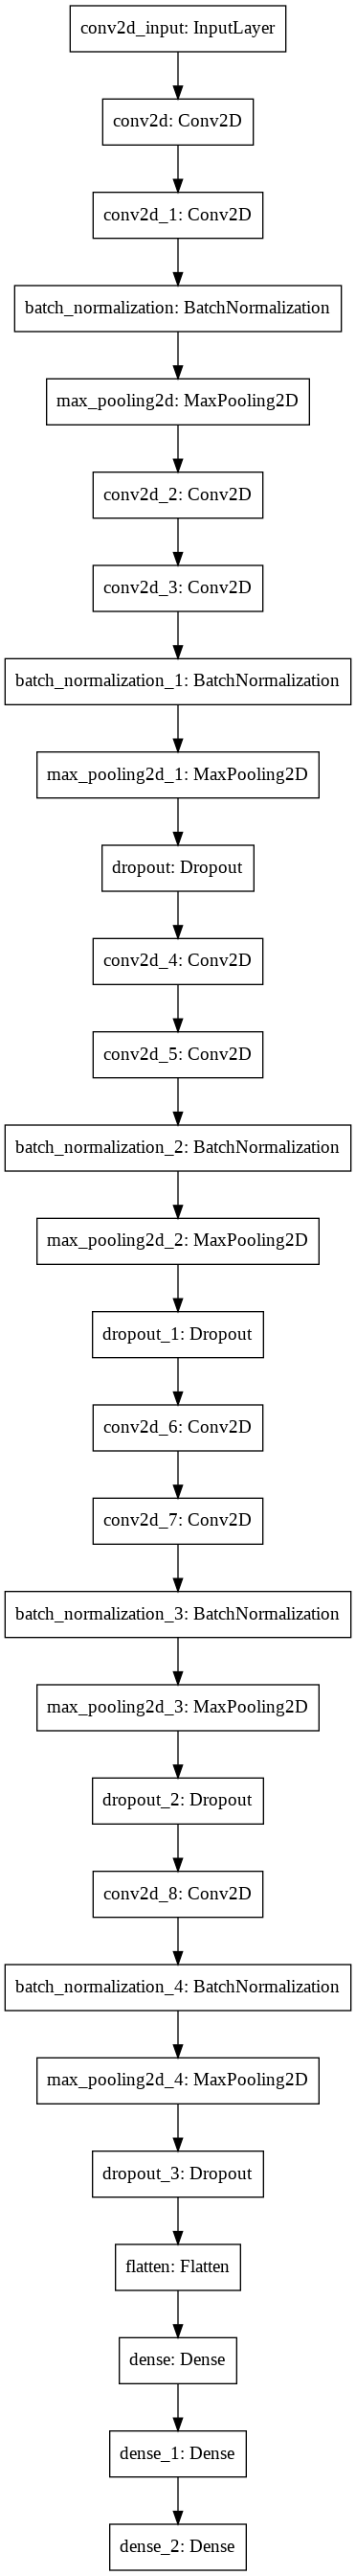

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
# Image Data generator for Training directory

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/TARP_dataset_1 (1)/Train (1)',
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 2000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID (1)': 0, 'NORMAL (1)': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '//content/drive/MyDrive/TARP_dataset_1 (1)/Test (1)',
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 400 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=32,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=16
)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
32/32 [==============================] - 581s 17s/step - loss: 1.7288 - categorical_accuracy: 0.8025 - val_loss: 2.2378 - val_categorical_accuracy: 0.4922
Epoch 2/100
32/32 [==============================] - 315s 10s/step - loss: 0.5495 - categorical_accuracy: 0.8775 - val_loss: 4.3051 - val_categorical_accuracy: 0.4609
Epoch 3/100
32/32 [==============================] - 198s 6s/step - loss: 0.5407 - categorical_accuracy: 0.8868 - val_loss: 3.9622 - val_categorical_accuracy: 0.4883
Epoch 4/100
32/32 [==============================] - 147s 5s/step - loss: 0.3114 - categorical_accuracy: 0.9283 - val_loss: 3.0849 - val_categorical_accuracy: 0.4844
Epoch 5/100
32/32 [==============================] - 108s 3s/step - loss: 0.3047 - categorical_accuracy: 0.9266 - val_loss: 4.9244 - val_categorical_accuracy: 0.4883
Epoch 6/100
32/32 [==============================] - 88s 3s/step - loss: 0.1625 - categorical_accuracy: 0.9541 - val_loss: 4.7422 - val_categorical_accuracy: 0.4844
Epo

In [ ]:
import random
import tensorflow
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
layer_outputs = [layer.output for layer in model.layers[1:]]

In [ ]:
visualize_model = tensorflow.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [ ]:
img=load_img('/content/drive/MyDrive/TARP_dataset_1 (1)/Test (1)/COVID (1)/COVID-827 (1).png',target_size=(224,224))

In [ ]:
x = img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x.reshape((1,224,224,3))
print(x.shape)

(1, 224, 224, 3)


In [ ]:
x=x/225

In [ ]:
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

26


In [ ]:
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d', 'conv2d_1', 'batch_normalization', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'batch_normalization_1', 'max_pooling2d_1', 'dropout', 'conv2d_4', 'conv2d_5', 'batch_normalization_2', 'max_pooling2d_2', 'dropout_1', 'conv2d_6', 'conv2d_7', 'batch_normalization_3', 'max_pooling2d_3', 'dropout_2', 'conv2d_8', 'batch_normalization_4', 'max_pooling2d_4', 'dropout_3', 'flatten', 'dense', 'dense_1', 'dense_2']


In [ ]:
%matplotlib inline

(1, 220, 220, 16)
(1, 220, 220, 16)
(1, 110, 110, 16)
(1, 108, 108, 32)
(1, 106, 106, 32)
(1, 106, 106, 32)
(1, 53, 53, 32)
(1, 53, 53, 32)
(1, 49, 49, 64)
(1, 45, 45, 64)
(1, 45, 45, 64)
(1, 22, 22, 64)
(1, 22, 22, 64)
(1, 18, 18, 128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(1, 14, 14, 128)
(1, 14, 14, 128)
(1, 7, 7, 128)
(1, 7, 7, 128)
(1, 3, 3, 256)
(1, 3, 3, 256)
(1, 1, 1, 256)
(1, 1, 1, 256)
(1, 256)
(1, 1024)
(1, 512)
(1, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


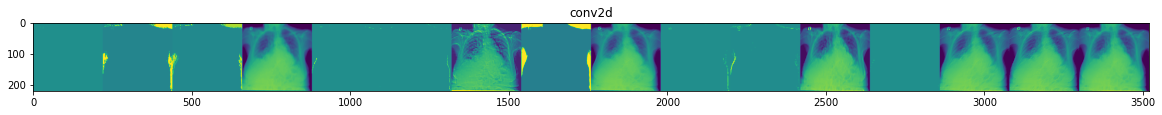

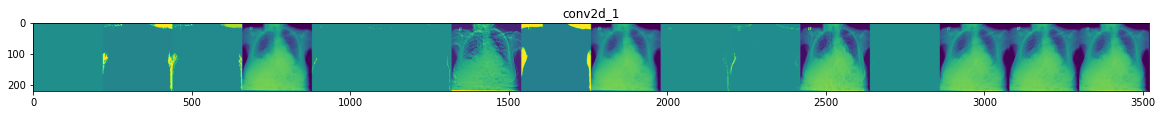

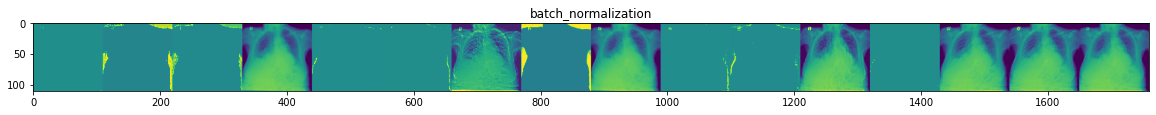

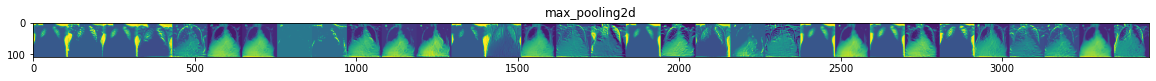

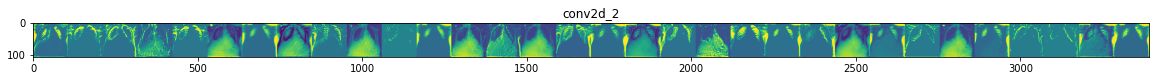

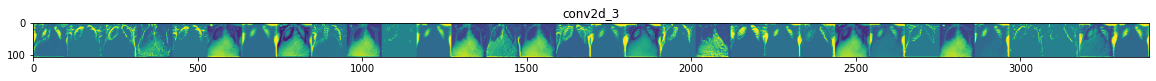

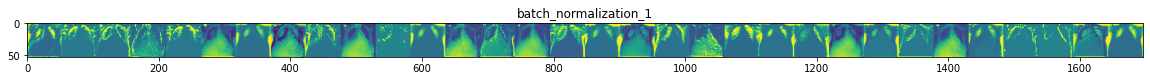

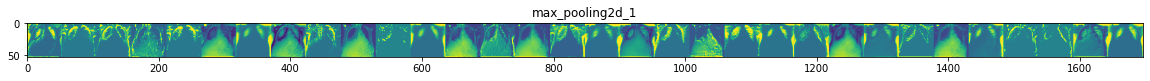

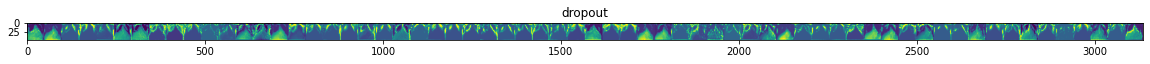

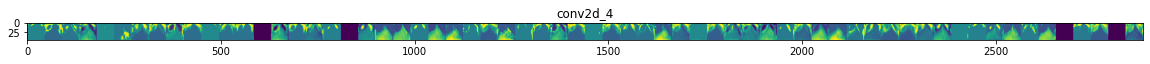

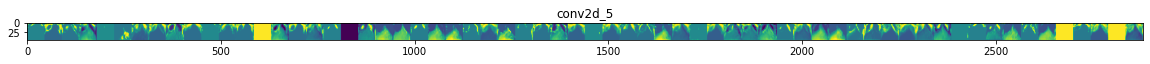

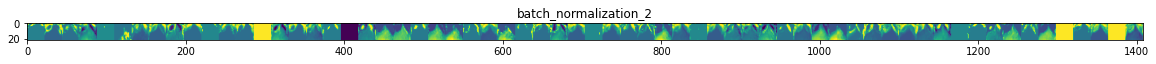

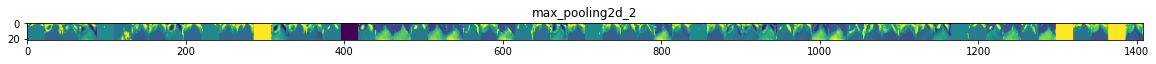

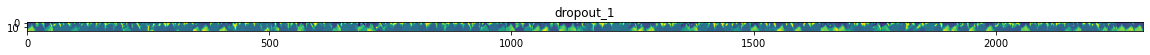

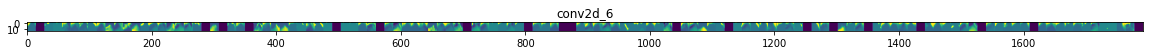

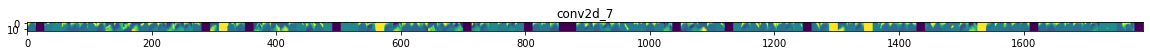

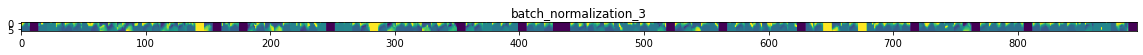

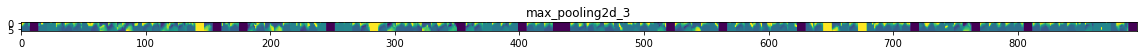

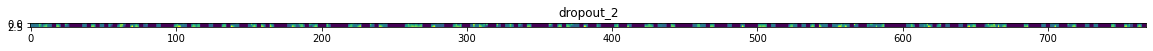

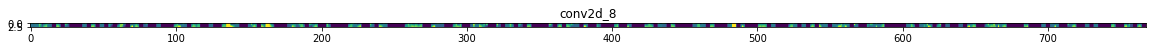

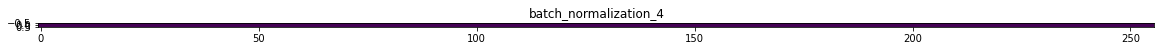

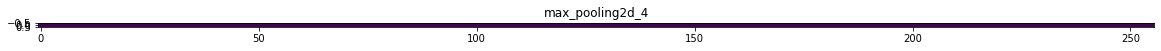

In [ ]:
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size*channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale*channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


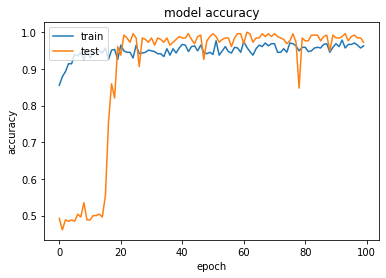

In [ ]:
#Plotting the results [accuracy]

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

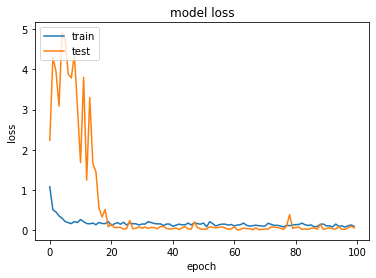

In [ ]:
#Plotting the results [loss]

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(train_generator)

125/125 [==============================] - 30s 242ms/step - loss: 0.1041 - categorical_accuracy: 0.9610


[0.10409675538539886, 0.9610000252723694]

In [ ]:
model.evaluate(validation_generator)

25/25 [==============================] - 2s 80ms/step - loss: 0.0570 - categorical_accuracy: 0.9775


[0.057044580578804016, 0.9775000214576721]

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():

#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(224, 224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=16)
#   print(classes[0])